In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import pickle
from mix_Network import *

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

# Testing HOTS on N-MNIST with Lagorce 2017 methodology

- loading 15 random digits instead of 3 cycles with 5 digits for learning clusters

In [10]:
hots = network(krnlinit='first', tau=1, homeo=False)
loader, order = hots.learning1by1()

none
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


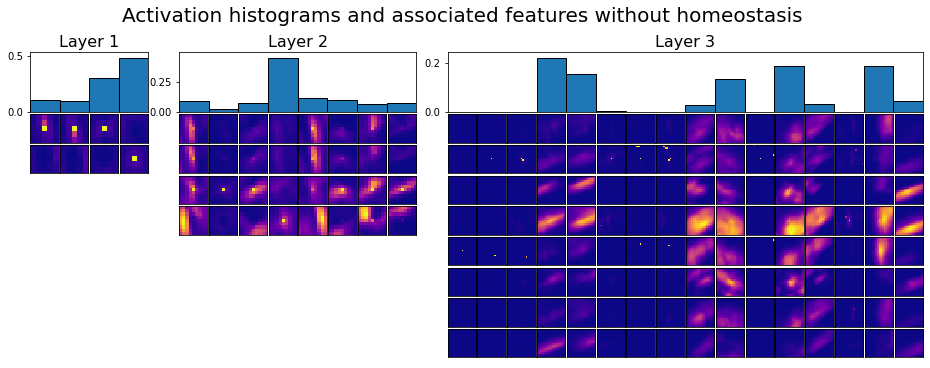

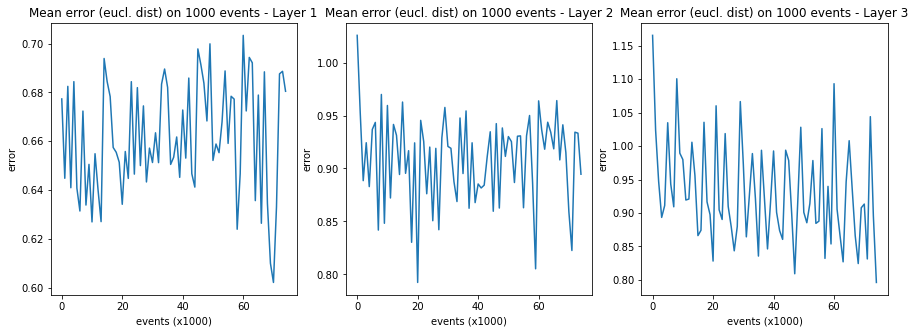

In [11]:
hots.plotlayer()
hots.plotconv()

In [12]:
trainmap, loader, _  = hots.running(loader, order)
testmap, loader, _  = hots.running(loader, order)

In [ ]:
histoscore(trainmap,testmap)

## Adding Homeostasis

none
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


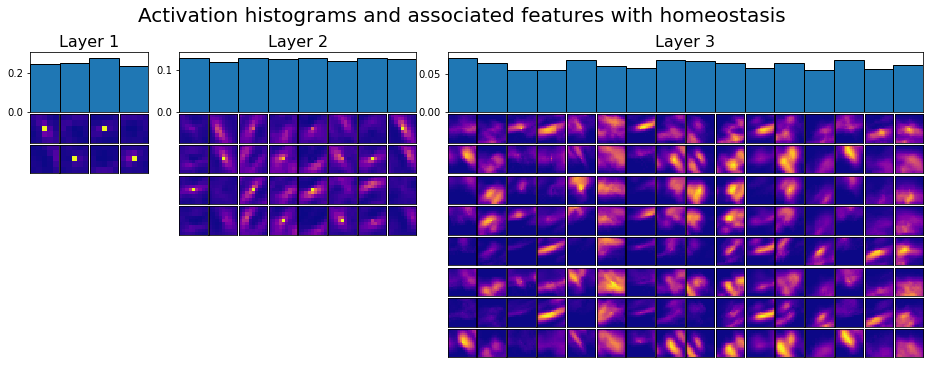

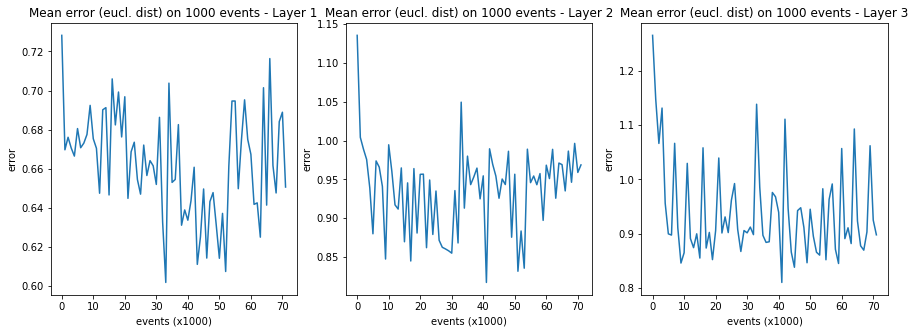

In [13]:
homhots = network(krnlinit='first', tau=1, homeo=True)
loaderhom, order = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

In [ ]:
trainmaphom, loaderhom, _  = homhots.running(loaderhom, order)
testmaphom, loaderhom, _  = homhots.running(loaderhom, order)
histoscore(trainmaphom,testmaphom)

### Classification without homeostasis

In [ ]:
for i in range(len(homhots.L)):
    homhots.L[i].homeo=False
trainmaphom, loader, _  = homhots.running(loader, order)
testmaphom, loader, _  = homhots.running(loader, order)
histoscore(trainmaphom,testmaphom)

# Random initialisation of the kernels

In [ ]:
hots = network(krnlinit='rdn', tau=1)
loader, order = hots.learning1by1()
hots.plotlayer()
hots.plotconv()

In [ ]:
trainmap, loader, _  = hots.running(loader, order)
testmap, loader, _  = hots.running(loader, order, trainmap)
histoscore(trainmap,testmap)

## Adding Homeostasis

In [ ]:
homhots = network(krnlinit='rdn', tau=1, homeo=True)
loaderhom, order = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

In [ ]:
trainmaphom, loaderhom, _  = homhots.running(loaderhom, order)
testmaphom, loaderhom, _ = homhots.running(loaderhom, order)
histoscore(trainmaphom,testmaphom)

### Classification without homeostasis

In [ ]:
for i in range(len(homhots.L)):
    homhots.L[i].homeo=False
trainmaphom2, loaderhom, _  = homhots.running(loaderhom, order)
testmaphom2, loaderhom, _  = homhots.running(loaderhom, order)
histoscore(trainmaphom2,testmaphom2)